## Creación de un modelo de ML para predecir el salario inicial de un estudiante que acaba de terminar sus estuidos

Realizado por <b>Fernando Sacó Vidal</b> para tarea de evaluación

No he usado ningún tipo de IA para el código que he escrito. Me he basado en las explicaciones de clase y en los ejemplos suministrados en los apuntes



Para realizar este ejercicio de evaluación voy a usar un dataset bajado de la página de kaggle [https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity](https://www.kaggle.com/datasets/adilshamim8/education-and-career-success)

El Dataset recoge 5.000 entradas con diferentes datos de educación de personas y su correspondencia con el <b>salario inicial</b> que obtienen. EL objetivo de este ejercicio es predicir con los estudios que tiene una persona que <b>salario inicial</b> va a tener.


 # Importación del dataset y comprobación de los datos

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("datos/education_career_success.csv")
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


Compruebo los datos del dataset

In [28]:
df.count()

Student_ID               5000
Age                      5000
Gender                   5000
High_School_GPA          5000
SAT_Score                5000
University_Ranking       5000
University_GPA           5000
Field_of_Study           5000
Internships_Completed    5000
Projects_Completed       5000
Certifications           5000
Soft_Skills_Score        5000
Networking_Score         5000
Job_Offers               5000
Starting_Salary          5000
Career_Satisfaction      5000
Years_to_Promotion       5000
Current_Job_Level        5000
Work_Life_Balance        5000
Entrepreneurship         5000
dtype: int64

In [29]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


Elimino las columnas que no veo necesarias

In [30]:

columnas_eliminar = {'Student_ID','Work_Life_Balance','Entrepreneurship','Work_Life_Balance'}
df = df.drop(columnas_eliminar, axis=1)

df.head() 

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry
1,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry
3,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid
4,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry


Compruebo el tipo de datos y los valores nulos que pueda tener el Dataframe

In [31]:
# Comprobar la información del dataframe cargado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Gender                 5000 non-null   object 
 2   High_School_GPA        5000 non-null   float64
 3   SAT_Score              5000 non-null   int64  
 4   University_Ranking     5000 non-null   int64  
 5   University_GPA         5000 non-null   float64
 6   Field_of_Study         5000 non-null   object 
 7   Internships_Completed  5000 non-null   int64  
 8   Projects_Completed     5000 non-null   int64  
 9   Certifications         5000 non-null   int64  
 10  Soft_Skills_Score      5000 non-null   int64  
 11  Networking_Score       5000 non-null   int64  
 12  Job_Offers             5000 non-null   int64  
 13  Starting_Salary        5000 non-null   float64
 14  Career_Satisfaction    5000 non-null   int64  
 15  Year

Comprobamos si hay valores nulos para rellenar o eliminar

In [32]:
df.isnull().sum()

Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
dtype: int64

No existen valores nulos, por lo que no tengo que hacer ninguna eliminación de fila o relleno de datos

# Visionado de datos

Realizo diferentes gráficas para ver qué variables independientes afectan más al target Starting_Salary

In [33]:
import seaborn as sns

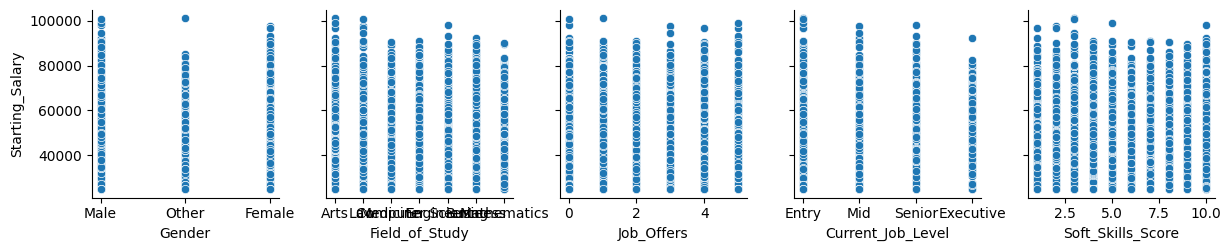

In [34]:
y_variable = 'Starting_Salary'
x_variable = ['Gender','Field_of_Study','Job_Offers','Current_Job_Level','Soft_Skills_Score']
sns.pairplot(df,x_vars=x_variable,y_vars=y_variable)


Esto es una simple curiosidad para ver lo que afecta la media redondeada de la carrera al salario

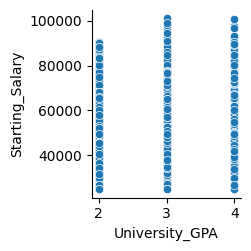

In [35]:
df_copia = df
df_copia['University_GPA'] = df_copia['University_GPA'].round(0)

sns.pairplot(df,x_vars='University_GPA',y_vars='Starting_Salary')

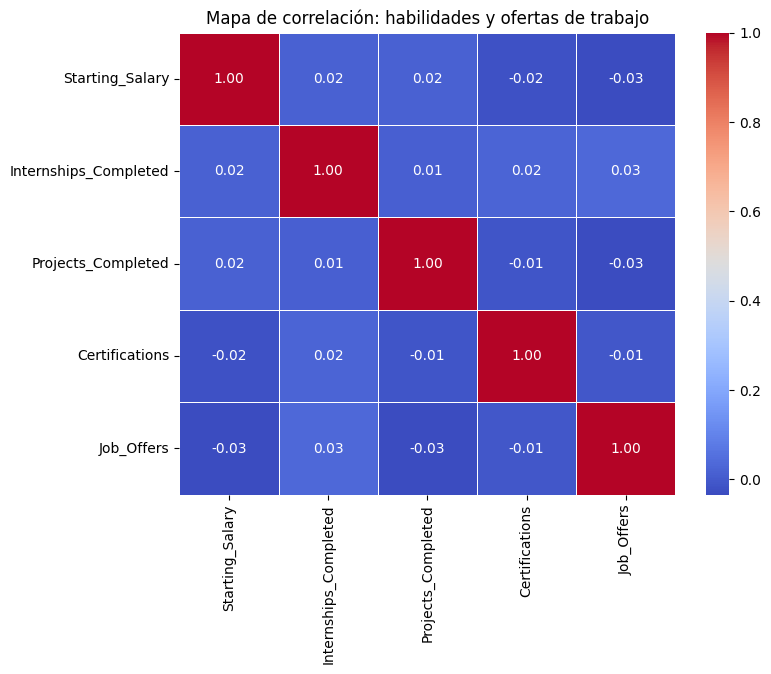

In [36]:



# Heatmap: Correlación entre pasantías, proyectos, certificaciones y ofertas de trabajo
plt.figure(figsize=(8, 6))
corr_cols = ["Starting_Salary","Internships_Completed", "Projects_Completed", "Certifications", "Job_Offers"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlación: habilidades y ofertas de trabajo")
plt.show()

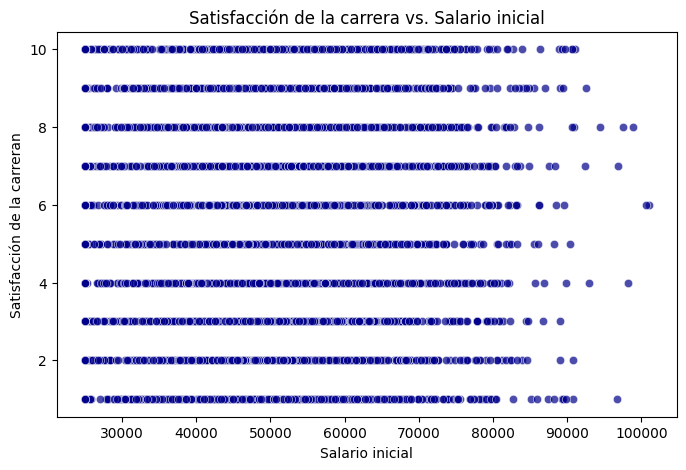

In [13]:
# Scatter Plot: Career Satisfaction vs. Starting Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Starting_Salary", y="Career_Satisfaction", alpha=0.7, color="darkblue")
plt.title("Satisfacción de la carrera vs. Salario inicial")
plt.xlabel("Salario inicial")
plt.ylabel("Satisfacción de la carreran")
plt.show()

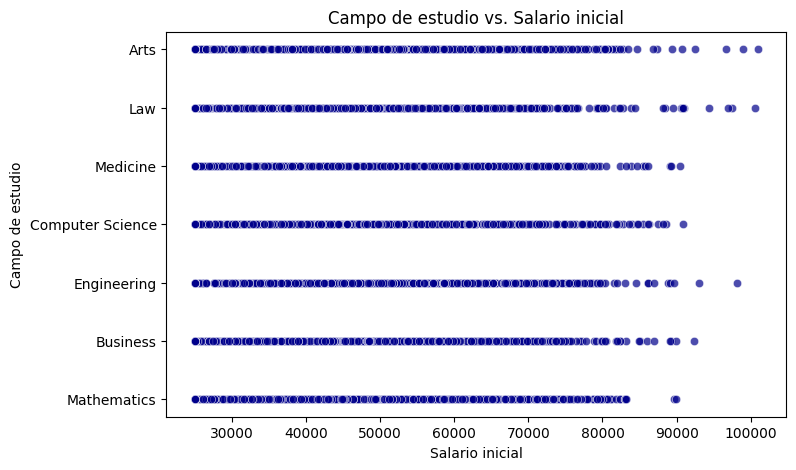

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Starting_Salary", y="Field_of_Study", alpha=0.7, color="darkblue")
plt.title("Campo de estudio vs. Salario inicial")
plt.xlabel("Salario inicial")
plt.ylabel("Campo de estudio")
plt.show()

Voy a convertir las variables categóricas a numéricas.

In [37]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df['Gender'] = class_label_encoder.fit_transform(df['Gender'].values)
df['Field_of_Study'] = class_label_encoder.fit_transform(df['Field_of_Study'].values)
df['Current_Job_Level'] = class_label_encoder.fit_transform(df['Current_Job_Level'].values)



df.head()

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level
0,24,1,3.58,1052,291,4.0,0,3,7,2,9,8,5,27200.0,4,5,0
1,21,2,2.52,1211,112,4.0,4,4,7,3,8,1,4,25000.0,1,1,2
2,28,0,3.42,1193,715,3.0,6,4,8,1,1,9,0,42400.0,9,3,0
3,25,1,2.43,1497,170,3.0,2,3,9,1,10,6,1,57400.0,7,5,2
4,22,1,2.08,1012,599,2.0,3,4,6,4,10,9,4,47600.0,9,5,0


# División del dataset 

Separo la columna objetivo y la añado a la variable y

In [38]:
# Separar la columna objetivo
X = df.drop("Starting_Salary",axis=1) 

#Columna de salirio inicial para y
y = df.iloc[:, [-4]].values

print("Feature set size:",X.shape)
print("Variable set size:",y.shape)


Feature set size: (5000, 16)
Variable set size: (5000, 1)


Vemos los valores independientes

In [39]:
X.head()

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Career_Satisfaction,Years_to_Promotion,Current_Job_Level
0,24,1,3.58,1052,291,4.0,0,3,7,2,9,8,5,4,5,0
1,21,2,2.52,1211,112,4.0,4,4,7,3,8,1,4,1,1,2
2,28,0,3.42,1193,715,3.0,6,4,8,1,1,9,0,9,3,0
3,25,1,2.43,1497,170,3.0,2,3,9,1,10,6,1,7,5,2
4,22,1,2.08,1012,599,2.0,3,4,6,4,10,9,4,9,5,0


Separamos los datos de prueba y los de entrenamiento

In [40]:
from sklearn.model_selection import train_test_split

#20% de los datos para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
""" features = df.drop('Starting_Salary', axis=1).columns

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Starting_Salary', y=feature, data=df)
    plt.title(f'{feature} vs Salario Inicial')
    plt.show() """

" features = df.drop('Starting_Salary', axis=1).columns\n\nfor feature in features:\n    plt.figure(figsize=(10, 6))\n    sns.boxplot(x='Starting_Salary', y=feature, data=df)\n    plt.title(f'{feature} vs Productivity Score')\n    plt.show() "

# Estandarización de los datos

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

Veo que los datos estén estandarizados

In [42]:
X_test.flatten()

array([-0.99963465,  0.74217466, -1.04016377, ...,  0.1358023 ,
       -0.01806354, -0.95391956])

# Creaciación del modelos con RandomForestRegressor
Voy a usar este modelo de regresión para predecir los salarios

In [43]:
from sklearn.ensemble import RandomForestRegressor  # Importamos el modelo
from sklearn.metrics import mean_squared_error # Para evaluar el modelo



Utilizo GridSearchCV para ver cuales son los mejores parámetros.

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

c:\Users\FerDev\.conda\envs\AutoML\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\FerDev\.conda\envs\AutoML\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\FerDev\.conda\envs\AutoML\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\FerDev\.conda\envs\AutoML\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

In [45]:
print("Mejor estimador:", grid_search.best_estimator_)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejor estimador: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 200}
Mejor puntuación: -0.025557240275712535


Uso los mejores parámetros que me da Grid Search

In [46]:

model_RF = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42) # n_estimators es el número de árboles

# Entrenar el modelo
model_RF.fit(X_train, y_train)

# Predicciones
y_pred = model_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

c:\Users\FerDev\.conda\envs\AutoML\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Error cuadrático medio en el conjunto de prueba: 1.0352031814424885


In [47]:
predictions = model_RF.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000,)


# Cálculo de errores
Finalmente veo las diferentes métricas de error del modelo y hago un gráfico para ver los valores reales con los que predice el modelo

In [48]:

from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 0.8261976012238083
Mean square error (MSE): 1.0352031814424885
Root mean square error (RMSE): 1.0174493507995808
R-squared value of predictions: -0.018


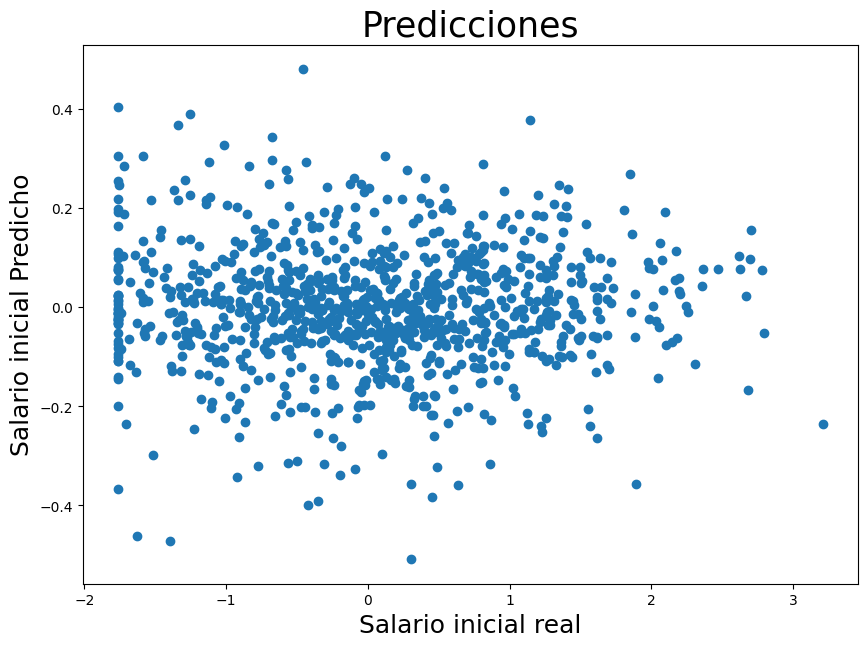

In [49]:
plt.figure(figsize=(10,7))
plt.title("Predicciones",fontsize=25)
plt.xlabel("Salario inicial real",fontsize=18)
plt.ylabel("Salario inicial Predicho", fontsize=18)
plt.scatter(x=y_test,y=predictions)

# Mis Conclusiones

Viendo las métricas de los datos y los gráficos, y después de haber probado otros modelos antes, creo que los datos del dataset no me están dando unos valores claros con los que pueda establecer una relación entre el salario de una persona y sus estudios. Supongo que debería descartar campos para tener un modelo mejor.